# Problems 3,4

In [1]:
# Import the libraries we'll need

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import qit
from scipy.linalg import expm
%matplotlib inline

In [2]:
# Define 1-qubit Pauli operators

X = qit.lmap(np.array([[0, 1], [1, 0]]))
Y = qit.lmap(np.array([[0, -1j], [1j, 0]]))
Z = qit.lmap(np.array([[1, 0], [0, -1]]))

In [3]:
# Define the main Hamiltonian we'll be working with

def H(b, g):
    tmp_1 = b * qit.tensor(X, X)
    tmp_2 = g * qit.tensor(Y, Y)
    return tmp_1 + tmp_2

In [4]:
# Define the initial states we'll be working with (theta and phi take real values)

init_1 = qit.state('00', (2,2))

def init_2(theta):
    tmp_1 = np.cos(theta)
    tmp_2 = np.sin(theta)
    tmp_3 = qit.state('00', (2,2))
    tmp_4 = qit.state('11', (2,2))
    return tmp_1 * tmp_3 + tmp_2 * tmp_4

def init_3(theta_1, phi_1, theta_2, phi_2):
    tmp_0 = np.cos(theta_1)
    tmp_1 = np.sin(theta_1)
    tmp_2 = np.cos(theta_2)
    tmp_3 = np.sin(theta_2)
    tmp_4 = np.cos(phi_1) + 1j*np.sin(phi_1)
    tmp_5 = np.cos(phi_2) + 1j*np.sin(phi_2)
    tmp_6 = qit.state('00', (2,2))
    tmp_7 = qit.state('11', (2,2))
    tmp_8 = qit.state('10', (2,2))
    tmp_9 = qit.state('01', (2,2))
    return tmp_0 * tmp_2 * tmp_6 + tmp_4 * tmp_5 * tmp_1 * tmp_3 * tmp_7 + tmp_4 * tmp_1 * tmp_2 * tmp_8 + tmp_5 * tmp_0 * tmp_3 * tmp_9

In [5]:
# Define time-evolved states by the Hamiltonian

def init_1_ev(t, g):
    return qit.state.propagate(init_1, H(1, g).data, t)

def init_2_ev(t, g, theta):
    return qit.state.propagate(init_2(theta), H(1, g).data, t)
    
def init_3_ev(t, b, theta_1, phi_1, theta_2, phi_2):
    return qit.state.propagate(init_3(theta_1, phi_1, theta_2, phi_2), H(b, 1).data, t)

In [6]:
# Create space of parameters

k = 100
tau = np.linspace(0, 2*np.pi, k)
gamma = np.linspace(0,1, k)
theta = np.linspace(0, 2*np.pi, k)

In [7]:
# Define entanglement velocity (according parameter and initial state) before differentiation with respect to time

G_1_b4_d = np.zeros((len(tau), len(gamma)))
G_2_b4_d = np.zeros((len(tau), len(theta)))

for i in range(len(tau)):
    for j in range(len(gamma)):
        G_1_b4_d[i, j] = qit.state.entropy(qit.state.ptrace(init_1_ev(tau[i], gamma[j]), [1]))

for i in range(len(tau)):
    for j in range(len(theta)):
        G_2_b4_d[i, j] = qit.state.entropy(qit.state.ptrace(init_2_ev(tau[i], 0.5, theta[j]), [1]))

In [8]:
# Let's now differentiate the stuff using finite differences method

# Pick a step for finite difference differentiation
delta_tau = 0.01

G_1 = np.zeros((len(tau)-1, len(gamma)))
G_2 = np.zeros((len(tau)-1, len(theta)))

for j in range(len(gamma)):
    G_1[:, j] = np.diff(G_1_b4_d[:,j]) / delta_tau
    
for j in range(len(theta)):
    G_2[:, j] = np.diff(G_2_b4_d[:,j]) / delta_tau

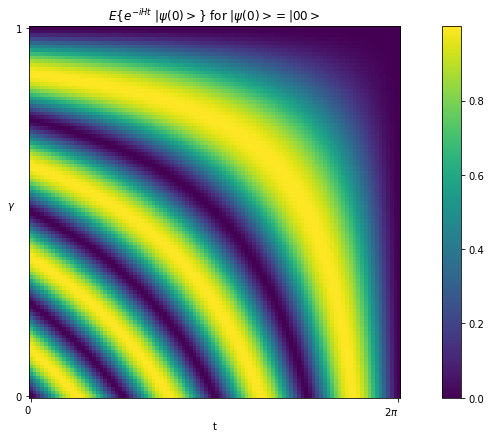

In [9]:
# Let's first look at E(t), i.e. the integral of velocity. I'm doing it here just for the sake of curiosity

fig, ax = plt.subplots(figsize=(12, 6))
im = ax.imshow(G_1_b4_d)
ax.set_xticks([0,99])
ax.set_yticks([0,99])
ax.set_xticklabels(['0','$2\pi$'])
ax.set_yticklabels(['1','0'])
plt.setp(ax.get_xticklabels(), rotation=0, ha="right",
         rotation_mode="anchor")
ax.set_title("$E\{e^{-iHt} \ |\psi (0)>\}$ for $|\psi (0)> = |00>$")
fig.tight_layout()
cbar = ax.figure.colorbar(im, ax=ax)
plt.xlabel('t')
plt.ylabel('$\gamma$', rotation=0)
plt.show()

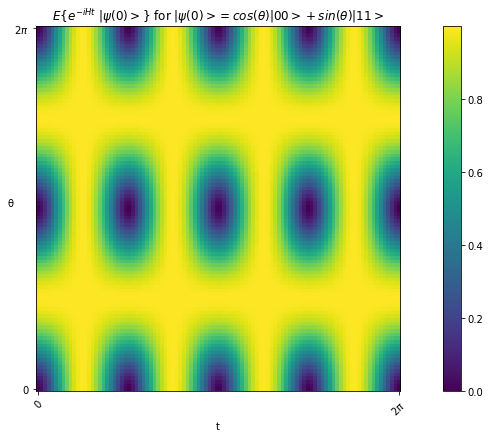

In [10]:
fig, ax = plt.subplots(figsize=(12, 6))
im = ax.imshow(G_2_b4_d)
ax.set_xticks([0,99])
ax.set_yticks([0,99])
ax.set_xticklabels(['0','$2\pi$'])
ax.set_yticklabels(['$2\pi$','0'])
plt.setp(ax.get_xticklabels(), rotation=0, ha="right",
         rotation_mode="anchor")
ax.set_title("$E\{e^{-iHt} \ |\psi (0)>\}$ for $|\psi (0)> = cos(θ)|00> + sin(θ)|11>$")
fig.tight_layout()
cbar = ax.figure.colorbar(im, ax=ax)
plt.xlabel('t')
plt.ylabel('θ', rotation=0)
plt.show()

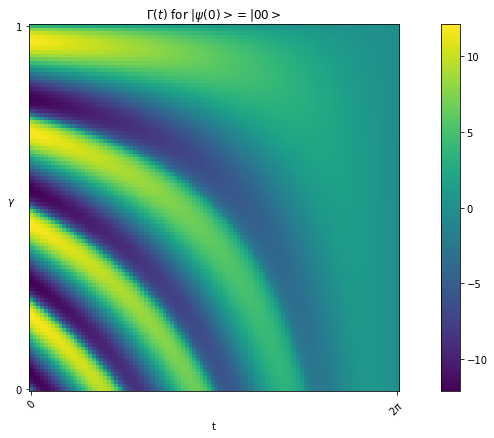

In [11]:
# Now let's plot the entanglement velocity itself

fig, ax = plt.subplots(figsize=(12, 6))
im = ax.imshow(G_1)
ax.set_xticks([0,99])
ax.set_yticks([0,98])
ax.set_xticklabels(['0','$2\pi$'])
ax.set_yticklabels(['1','0'])
plt.setp(ax.get_xticklabels(), rotation=0, ha="right",
         rotation_mode="anchor")
ax.set_title("$\Gamma(t)$ for $|\psi (0)> = |00>$")
fig.tight_layout()
cbar = ax.figure.colorbar(im, ax=ax)
plt.xlabel('t')
plt.ylabel('$\gamma$', rotation=0)
plt.show()

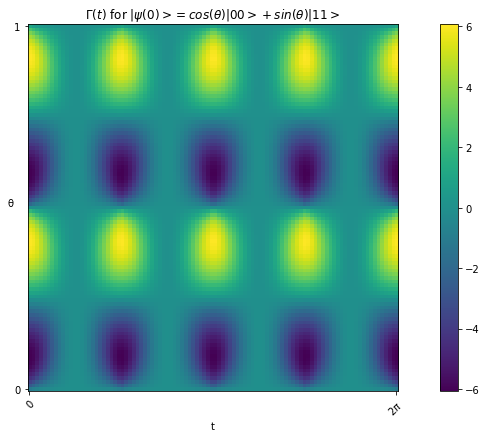

In [12]:
fig, ax = plt.subplots(figsize=(12, 6))
im = ax.imshow(G_2)
ax.set_xticks([0,99])
ax.set_yticks([0,98])
ax.set_xticklabels(['0','$2\pi$'])
ax.set_yticklabels(['1','0'])
plt.setp(ax.get_xticklabels(), rotation=0, ha="right",
         rotation_mode="anchor")
ax.set_title("$\Gamma(t)$ for $|\psi (0)> = cos(θ)|00> + sin(θ)|11>$")
fig.tight_layout()
cbar = ax.figure.colorbar(im, ax=ax)
plt.xlabel('t')
plt.ylabel('θ', rotation=0)
plt.show()

It can be seen from the plots, that the entanglement is high in brighter regions, but the periodicity is different: while for the second initial state it can be seen the peaks occur at $t = n \frac{\pi}{2}$($n=0,1,2...$), the periodicity for the first initial state seems to be more complex (polar coordinates?).

In [13]:
# Now let's try to tackle problem 4

# Create space of parameters
steps = 4
tau_1 = np.linspace(0, 0.001, 10)
theta_1 = np.linspace(0, 2*np.pi, steps)
theta_2 = np.linspace(0, 2*np.pi, steps)
phi_1 = np.linspace(0, 2*np.pi, steps)
phi_2 = np.linspace(0, 2*np.pi, steps)
beta = np.linspace(0, 1, steps)
delta_tau_1 = 0.01

In [14]:
# Define entanglement velocity (according parameter and initial state) before differentiation with respect to time
G_3_b4_d = np.zeros((len(tau_1), len(theta_1), len(phi_1), len(theta_2), len(phi_2), len(beta)))

In [15]:
for i in range(len(tau_1)):
    for j in range(len(theta_1)):
        for k in range(len(phi_1)):
            for l in range(len(theta_2)):
                for m in range(len(phi_2)):
                    for n in range(len(beta)):
                        G_3_b4_d[i, j, k, l, m, n] = qit.state.entropy(qit.state.ptrace(init_3_ev(tau_1[i], beta[n], theta_1[j], phi_1[k], theta_2[l], phi_2[m]), [1]))

C:\Users\Aleksandr\Anaconda3\lib\site-packages\qit\state.py:1151: RuntimeWarning: invalid value encountered in log2
  return -dot(p, np.log2(p))


In [16]:
G_3 = np.zeros((len(tau_1)-1, len(theta_1), len(phi_1), len(theta_2), len(phi_2), len(beta)))

for j in range(len(theta_1)):
        for k in range(len(phi_1)):
            for l in range(len(theta_2)):
                for m in range(len(phi_2)):
                    for n in range(len(beta)):
                        G_3[:, j, k, l, m, n] = (1 / delta_tau_1) * np.diff(G_3_b4_d[:, j, k, l, m, n], n=1, axis=0)
                        
np.max(np.nan_to_num(G_3))

0.0008936711093016281

In [17]:
for s in range(1,51):

    # Create space of parameters
    steps = 3
    tau_1 = np.linspace(0, 0.001/s, 10)
    theta_1 = np.linspace(0, 2*np.pi, steps)
    theta_2 = np.linspace(0, 2*np.pi, steps)
    phi_1 = np.linspace(0, 2*np.pi, steps)
    phi_2 = np.linspace(0, 2*np.pi, steps)
    beta = np.linspace(0, 1, steps)
    delta_tau_1 = 0.0000001
    
    # Define entanglement velocity (according parameter and initial state) before differentiation with respect to time
    G_3_b4_d = np.zeros((len(tau_1), len(theta_1), len(phi_1), len(theta_2), len(phi_2), len(beta)))
    
    for i in range(len(tau_1)):
        for j in range(len(theta_1)):
            for k in range(len(phi_1)):
                for l in range(len(theta_2)):
                    for m in range(len(phi_2)):
                        for n in range(len(beta)):
                            G_3_b4_d[i, j, k, l, m, n] = qit.state.entropy(qit.state.ptrace(init_3_ev(tau_1[i], beta[n], theta_1[j], phi_1[k], theta_2[l], phi_2[m]), [1]))
                            
    G_3 = np.zeros((len(tau_1)-1, len(theta_1), len(phi_1), len(theta_2), len(phi_2), len(beta)))

    for j in range(len(theta_1)):
        for k in range(len(phi_1)):
            for l in range(len(theta_2)):
                for m in range(len(phi_2)):
                    for n in range(len(beta)):
                        G_3[:, j, k, l, m, n] = (1 / delta_tau_1) * np.diff(G_3_b4_d[:, j, k, l, m, n])
                        
    print(round(np.max(np.nan_to_num(G_3)),2))

C:\Users\Aleksandr\Anaconda3\lib\site-packages\qit\state.py:1151: RuntimeWarning: invalid value encountered in log2
  return -dot(p, np.log2(p))


42.17
11.59
5.43
3.16
2.08
1.47
1.1
0.86
0.68
0.56
0.47
0.4
0.34
0.3
0.26
0.23
0.21
0.18
0.17
0.15
0.14
0.13
0.12
0.11
0.1
0.09
0.09
0.08
0.07
0.07
0.07
0.06
0.06
0.05
0.05
0.05
0.05
0.04
0.04
0.04
0.04
0.04
0.04
0.03
0.03
0.03
0.03
0.03
0.03
0.03


It seems like the thing converges to zero. Any suggestions what can be wrong?